In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from scipy import stats


In [2]:
#EDA ANALYSIS 
# while doing eda analysis we followed the following steps:

In [3]:
# Loading  the dataset
sms_data = pd.read_csv('sms.csv')

In [4]:
# Display the first few rows of the dataset to understand its structure
sms_data.head()

,Fraudolent,SMS test,ID,Date and Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01


In [5]:
# the next thing we do is we try to see from the given dtaset which one is less relevant for us
# in our case its id because we dont need id to know if an sms is fradulent or no it doent affect us as much
sms_data = sms_data.drop('ID', axis=1)

In [6]:
# then we display the new first few rows by:
sms_data.head()

,Fraudolent,SMS test,Date and Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,2018-04-12
4,0,So there's a ring that comes with the guys cos...,2016-08-01


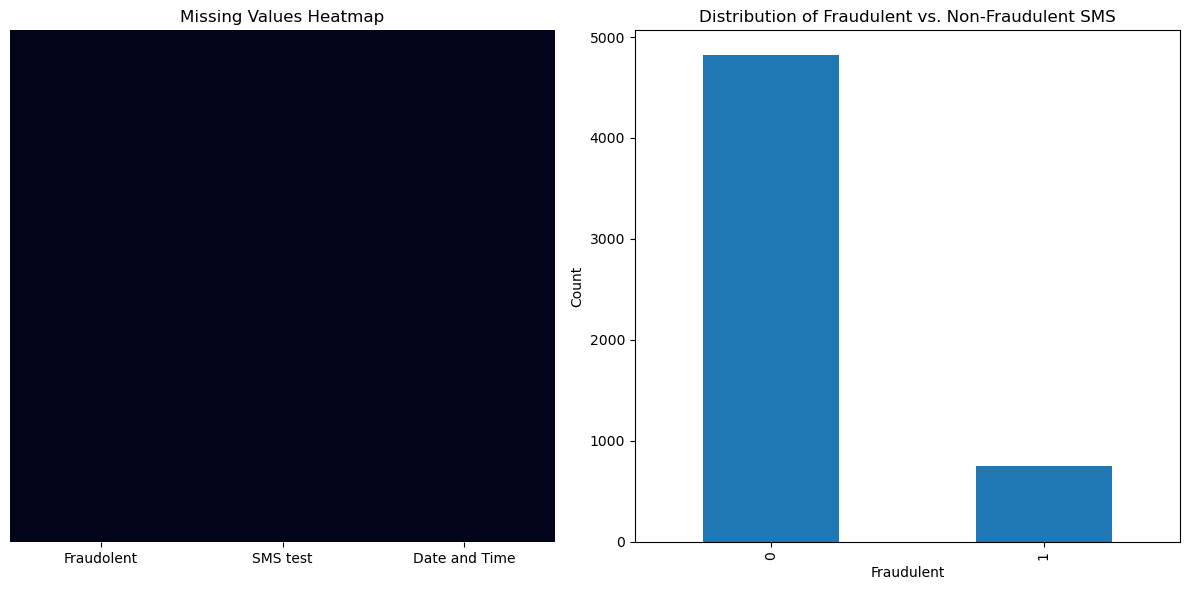

In [7]:

# Check for missing values
missing_values = sms_data.isnull().sum()
# isnull() is  a way of checking if the values are nan then true or esle its false.


# Distribution of fraudulent vs. non-fraudulent SMS
fraud_distribution = sms_data['Fraudolent'].value_counts()

# Visualization of the distribution
plt.figure(figsize=(12, 6))
# this is saying that we are setting up a new figure with a width of 12 
# and height of 6 inches

plt.subplot(1,2,1)
# this creates a subplot grid with 1 row and 2 columns and sets the first subplot
# as the current active subplot.
sns.heatmap(sms_data.isnull(), cbar=False, yticklabels=False)
# this heatmap helps us to visualize the missing values.
plt.title('Missing Values Heatmap')

plt.subplot(1, 2, 2)
# this switches the focus on second subplot in our 1x2 grid.
fraud_distribution.plot(kind='bar')
# this creates a bar chart from the fraud distribution.
# which means it will have bars for each unique value in the fradulent column.
plt.title('Distribution of Fraudulent vs. Non-Fraudulent SMS')
plt.xlabel('Fraudulent')
plt.ylabel('Count')

plt.tight_layout() # this adjusts the padding between the subplots to make sure that everything is spaced nicely.
plt.show()



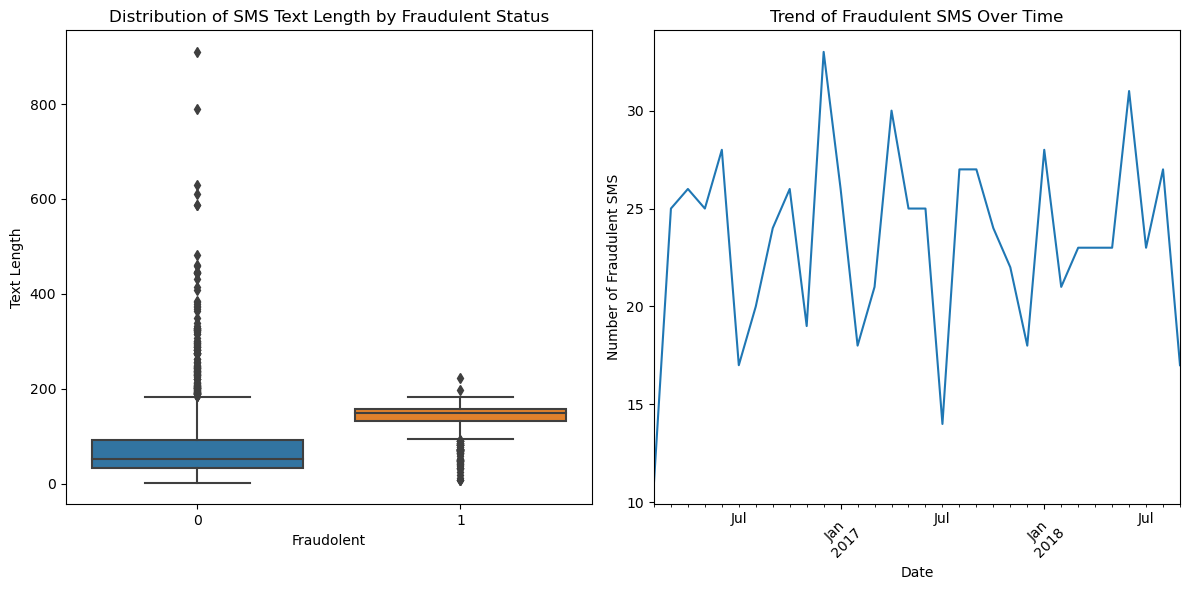

(Fraudolent       0
 SMS test         0
 Date and Time    0
 dtype: int64,
 0    4825
 1     747
 Name: Fraudolent, dtype: int64,
 count    5572.000000
 mean       80.368988
 std        59.926946
 min         2.000000
 25%        35.750000
 50%        61.000000
 75%       122.000000
 max       910.000000
 Name: Text Length, dtype: float64)

In [8]:
import matplotlib.dates as mdates
from datetime import datetime

# Convert 'Date and Time' to datetime object for analysis
sms_data['Date and Time'] = pd.to_datetime(sms_data['Date and Time'])

# here we are creating a column called text length in sms_data
# this textlength contains the length of each sms message
sms_data['Text Length'] = sms_data['SMS test'].apply(len)

Text_Length = sms_data['Text Length'].describe()

# Plotting the distribution of SMS text length for fraudulent and non-fraudulent messages
# plt figure helps us to create a new figure for plotting with our specification
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # creates a suplot grid of 1 row and 2 columns and creates the 1st suplot for the upcoming plot.
sns.boxplot(x='Fraudolent', y='Text Length', data=sms_data)
# creates a boxplot comparing the distribution of text length between fraudulent and non-fraudulent sms message
plt.title('Distribution of SMS Text Length by Fraudulent Status')

# Plotting the trend of fraudulent messages over time
plt.subplot(1, 2, 2) # switches the second subplot in the 1x2 grid
sms_data['Year-Month'] = sms_data['Date and Time'].dt.to_period('M')
# creates a new column Year- Month that contains the year and month extracted from date and time column
fraud_trend = sms_data[sms_data['Fraudolent'] == 1].groupby('Year-Month').size()
# it shows us the number of fradulent sms message for each year-month period and counts the size of each group
fraud_trend.plot()
# this is to show us the trend of the fradulent message over time as a line chart.
plt.title('Trend of Fraudulent SMS Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent SMS')
plt.xticks(rotation=45) # having a rotation as 45 degree is to help us for a better readability


plt.tight_layout() # it adjusts the space between each suplots inorder to avoid overlapping content.
plt.show()

missing_values, fraud_distribution, Text_Length


In [9]:
# Display the first few rows of the dataset to understand its structure
sms_data.head()

,Fraudolent,SMS test,Date and Time,Text Length,Year-Month
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,2017-12-02,147,2017-12
1,0,And also I've sorta blown him off a couple tim...,2018-03-23,116,2018-03
2,0,Mmm thats better now i got a roast down me! i...,2016-10-29,102,2016-10
3,0,Mm have some kanji dont eat anything heavy ok,2018-04-12,45,2018-04
4,0,So there's a ring that comes with the guys cos...,2016-08-01,112,2016-08


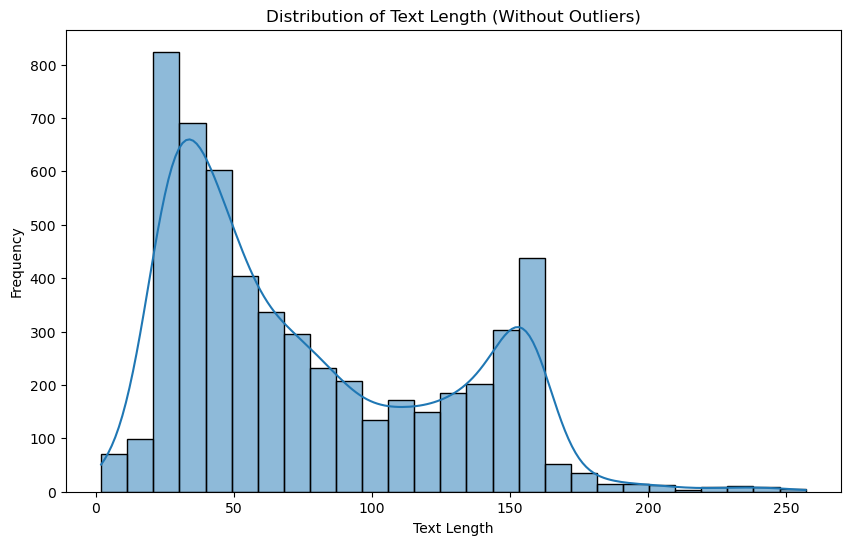

('total number of outliers  is', 65)

In [10]:
# Calculate the z-scores for 'SMS Length'
z_scores = stats.zscore(sms_data['Text Length'])
# we know that a z_score helps us to find the number of the outliers
# stats.zscore function takes Text_Length by substracting the mean and dividing it by the standard deviation
# in short its the forumla to calculate the z score

# Identify outliers based on z-scores
outliers = z_scores > 3
# we are creating a boolean value in which if the z score is greater than 3 its TRUE or else its FALSE
# we said its greater than 3 specifically is because of the emprrical rule in stastics.
# emperical rule says that approximately 99.7% of data falls within 3 standard deviations of the mean.


# Plotting the distribution of SMS Length without outliers
plt.figure(figsize=(10, 6)) # creates a new figure for plotting.
sns.histplot(sms_data.loc[~outliers, 'Text Length'], kde=True)
# this creates a histoplot by using the data Text Length column from sms.data
#this histoplot is created  ~outliers is FALSE because ~ means negation


plt.title('Distribution of Text Length (Without Outliers)')
plt.xlabel('Text Length') # is the x axis 
plt.ylabel('Frequency') # is the y axis 
plt.show()

# Count the number of outliers identified
outliers_count = ('total number of outliers  is' ,outliers.sum())
# this is the total number of TRUE values in the outliers based on our z score
# since TRUE is treated as 1 and FALSE as 0 then we count how many TRUE value we got which makes it the total summation.
outliers_count



In [11]:
# Converting 'Date and Time' to datetime object
sms_data['Date and Time'] = pd.to_datetime(sms_data['Date and Time'])

# Extracting Year and Month from each datetime entry and creates 2 columns in sms_data
# these columns will contain the year and month as integers respectively
sms_data['Year'] = sms_data['Date and Time'].dt.year
sms_data['Month'] = sms_data['Date and Time'].dt.month

# TF-IDF Encoding of 'SMS Text'
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# this is telling the vectorizer to build a vocabulary that only considers the top 5000 terms 
# we did max_features to 5000 is because for efficeny purposes

tfidf_matrix = tfidf_vectorizer.fit_transform(sms_data['SMS test'])
#we used "fit" because this part learns the vocabulary and the idf weighs f each term with in our text data
# this vocabulary that it learns is the set of unique terms in our data
# for us to know how unique they are or not we weigh the idf(inverse document frequency)
# low idf score means the word is not unique
# the transform part is where we actually transform the text documnet into numeric values
# tdif_matrix its output is going to be a sparse matrix that contains the tf-idf scores 

# One-Hot Encoding of 'Year' and 'Month' using pandas get_dummies
year_month_encoded = pd.get_dummies(sms_data[['Year', 'Month']], drop_first=True)
#The drop_first=True argument is used to avoid the dummy variable trap by dropping the first level for each categorical variable.

# Creating the final DataFrame for modeling by combining the TF-IDF and One-Hot Encoded features
X = pd.concat([
    pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()),
    year_month_encoded.reset_index(drop=True)
], axis=1) 
y = sms_data['Fraudolent']

# Splitting the dataset into training and validation sets by using train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# we are saying that 20% of the data is reserved for the validation set and the random state is set for reproducibility

# this is the shape of the training and validation
(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
#it helps us to see the size of each split

((4457, 5002), (1115, 5002), (4457,), (1115,))

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate a model on the training set
def evaluate_model_on_training(model, X_train, y_train):
    # its taking which takes three arguments which are the model, X_train and y_
    # Predict on the training set
    predictions = model.predict(X_train)
    
    # Calculate metrics
    accuracy = accuracy_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    recall = recall_score(y_train, predictions)
    f1 = f1_score(y_train, predictions)
    conf_matrix = confusion_matrix(y_train, predictions)
    
    # Print the evaluation metrics
    print(f"Model: {model.__class__.__name__} - Training Set Evaluation")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

# Evaluate each model on the training set
evaluate_model_on_training(logistic_model, X_train, y_train)
evaluate_model_on_training(random_forest_model, X_train, y_train)
evaluate_model_on_training(svm_model, X_train, y_train)
#Finally, the evaluate_model_on_training function is called for each of the three models (logistic_model, random_forest_model, svm_model) with the training data. 
#This will output the performance metrics for each model, but only on the training data.

Model: LogisticRegression - Training Set Evaluation
Accuracy: 0.9751
Precision: 0.9958
Recall: 0.8137
F1-Score: 0.8956
Confusion Matrix:
[[3870    2]
 [ 109  476]]

Model: RandomForestClassifier - Training Set Evaluation
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[3872    0]
 [   0  585]]

Model: SVC - Training Set Evaluation
Accuracy: 0.8687
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
[[3872    0]
 [ 585    0]]



/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models with default parameters
logistic_model = LogisticRegression(max_iter=1000) # we are saying maximum number of iterations the optimization algorthm should run until convergence is 1000.
random_forest_model = RandomForestClassifier()
svm_model = SVC()


# Fit the models to the training data
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
# we train (fit) each model using our training dataset.
#X_train contains the features of our training data
#y_train contains the corresponding target values. 
#Each .fit() method call adjusts the model parameters to best fit the training data.


# Predict on the test set
logistic_predictions = logistic_model.predict(X_val)
random_forest_predictions = random_forest_model.predict(X_val)
svm_predictions = svm_model.predict(X_val)
# here we  are making predictions on the same data used for training (X_train). 
#Each model's predict() method is used to generate predictions based on the learned parameters.

# Evaluate accuracy and other metrics
logistic_report = classification_report(y_val, logistic_predictions)
random_forest_report = classification_report(y_val, random_forest_predictions)
svm_report = classification_report(y_val, svm_predictions)
#We are generating classification reports for each model, comparing the actual target values (y_train) with the predicted values from each model. 
#The classification_report function generates a text report showing the main classification metrics, including precision, recall, f1-score, and accuracy.

# Print the reports for each model
print("Logistic Regression Classification Report:\n", logistic_report)
print("\nRandom Forest Classifier Classification Report:\n", random_forest_report)
print("\nSupport Vector Machine Classification Report:\n", svm_report)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       953
           1       1.00      0.78      0.88       162

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       953
           1       1.00      0.86      0.93       162

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       953
           1       0.00      0.00      0.00       162

    accuracy                           0

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear', class_weight='balanced')
#'liblinear' is a good choice for smaller datasets and binary classification.
#class_weight='balanced': This adjusts weights inversely proportional to class frequencies in the input data, which can be useful for imbalanced datasets.

# Create a hyperparameter grid to tune
# Note: The values in the grid should be adjusted based on the initial results and computational resources
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10], # Regularization strengths
    'penalty': ['l1', 'l2'] # L1 and L2 regularization penalties
    
}
#A dictionary param_grid is defined, specifying the hyperparameters to be tested. 
#It includes different values for C (regularization strength) and penalty (type of regularization)

# Initialize GridSearchCV with the F1 score as the performance metric and 'balanced' as the class weight
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, scoring='f1', cv=5, verbose=1)
# F1 score is a balance between precision and recall, useful for imbalanced datasets.
#cv=5 specifies 5-fold cross-validation.
#verbose=1 show detailed progress messages during the grid search.

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
#It will train the logistic regression model with each combination of parameters in the grid.
# it uses 5-fold cross-validation and evaluate each model using the F1 score.

# Get the best parameters and the best score
best_params = grid_search.best_params_
#best_params gives us  the parameters that yielded the best performance
best_score = grid_search.best_score_
#best_score is the highest F1 score achieved during the grid search.

print("Best parameters found: ", best_params)
print("Best F1 score found: ", best_score)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'C': 10, 'penalty': 'l2'}
Best F1 score found:  0.9467080355024491


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
# we set class_weight parameter  to 'balanced' because it helps us to handle imbalanced datasets by adjusting weights inversely proportional to class frequencies.
# we set random_state=42 so that it ensures us  that the results are reproducible.
# this random_state sets a seed for the random number generator used by the random forest.


# Create a hyperparameter grid to tune
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}
#This dictionary defines the grid of hyperparameters to be tested. 


# Initialize GridSearchCV with the F1 score as the performance metric
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='f1', cv=5, verbose=1)
#cv=5 indicates that 5-fold cross-validation will be used.
#This means the training set is split into 5 smaller sets, and for each combination of hyperparameters, the model is trained on 4 of these sets and validated on the 5th.
#verbose=1 shows us  more detailed output during the grid search process.

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)
#The model is trained with each combination of hyperparameters, and its performance is evaluated using 5-fold cross-validation.

# Get the best parameters and the best score 
best_params_rf = grid_search_rf.best_params _
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Random Forest found: ", best_params_rf)
print("Best F1 score for Random Forest found: ", best_score_rf)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest found:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 score for Random Forest found:  0.9286351390396372


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize the SVM classifier
svm_model = SVC(class_weight='balanced', random_state=42)

# Create a hyperparameter grid to tune
# Note: The ranges here are just examples; you should adjust them based on your specific case.
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Specifies the kernel type to be used in the algorithm
}

# Initialize GridSearchCV with the F1 score as the performance metric
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='f1', cv=5, verbose=1)

# Fit GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best parameters for SVM found: ", best_params_svm)
print("Best F1 score for SVM found: ", best_score_svm)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Replace these values with the ones you found to be best
best_C = 10  
best_penalty = 'l2' 
# these values are the previous hyperparameter tuning steps.

# Initialize the Logistic Regression model with the best parameters
best_logistic_model = LogisticRegression(C=best_C, penalty=best_penalty, solver='liblinear')

# Retrain the model on the full training data
best_logistic_model.fit(X_train, y_train)
# this trains the logistic egression model on the entire training dataset

# Predicting the validation set
y_pred_test = best_logistic_model.predict(X_val)

# Calculate the final evaluation metrics on the test set
final_accuracy = accuracy_score(y_val, y_pred_test) # calculates the percentage of the correct predictions
final_precision = precision_score(y_val, y_pred_test)#assesses the proportion of positive identifications that were actually correct
final_recall = recall_score(y_val, y_pred_test) # measures the proportion of actual positives that were identified correctly
final_f1 = f1_score(y_val, y_pred_test) # provides a balance between precision and recall

# Print the final metrics
print(f"Final Model Evaluation on Test Set:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1 Score: {final_f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred_test))


Final Model Evaluation on Test Set:
Accuracy: 0.9749
Precision: 1.0000
Recall: 0.8272
F1 Score: 0.9054

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       953
           1       1.00      0.83      0.91       162

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.97      0.97      1115

